###  py

In [1]:
import plots
from plots import *

In [2]:
# Example usage
# Create a sample dataframe
data = {
    'spot': [15, 50, 44],
    'vol': [5, 99, 68],
    'term_structure': [9, 100, 77],
    'skew': [5, 89, 77],
    'convex': [3, 99, 47],
    'correlation': [6, 100, 63]
}
date_labels = ['before', 'peak', 'now']

df = pd.DataFrame(data, index=date_labels)

# Columns to plot
columns = ['spot', 'vol', 'term_structure', 'skew', 'convex', 'correlation']

# Labels for the columns
labels = ['Spot', 'Vol 3m ATMF', 'Term structure (3m/6m)', 'Skew', 'Convex', 'Correlation']

# Colors dictionary
colorpalette = {
    'blue': (0/250, 145/250, 90/250),
    'red': (215/250, 48/250, 48/250),
    'green': (86/250, 180/250, 192/250),
    'orange': (239/250, 123/250, 90/250),
    'grey_light': (217/250, 217/250, 217/250)
}

# Should be = to date_labels
colors = {
    'before': colorpalette['green'],
    'peak': colorpalette['orange'],
    'now': colorpalette['blue']
}

### Data

###  Notebook

Plot saved to plot.png


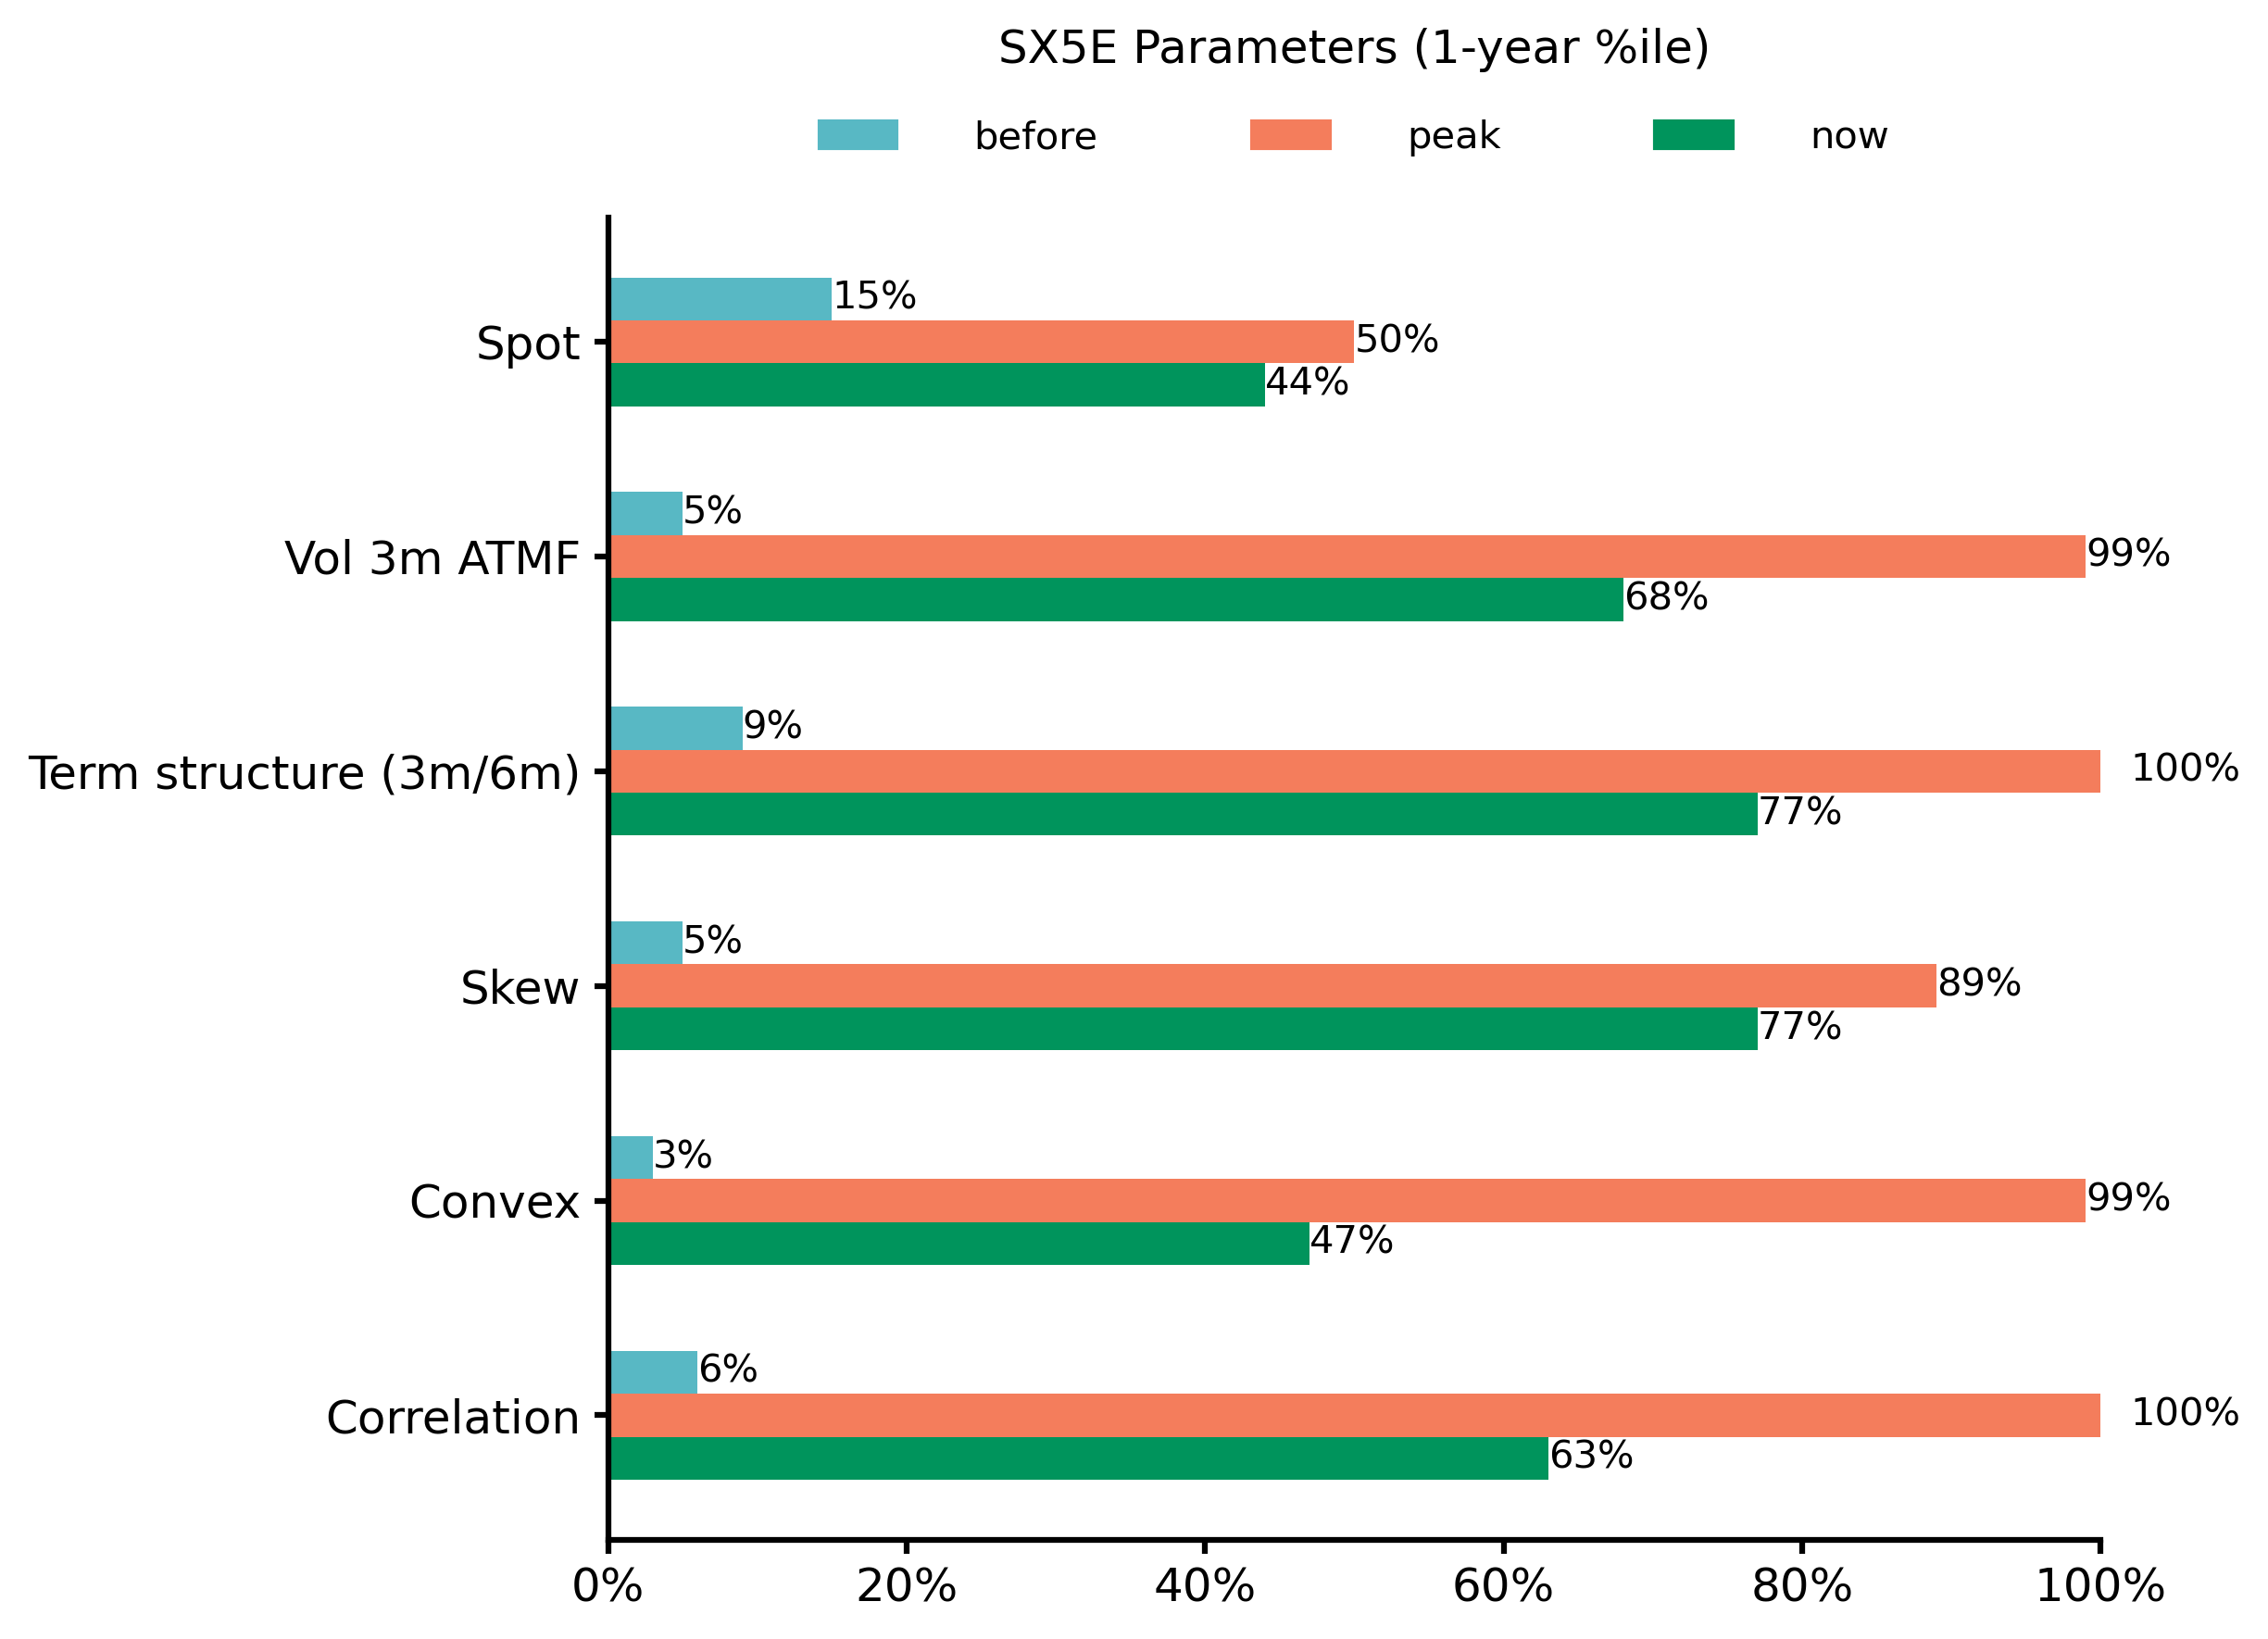

In [3]:
# Create the bar chart and save it to a file
create_bar_chart(df, columns, labels, colors, date_labels, title='SX5E Parameters (1-year %ile)', filename='plot.png', add_percentage_sign=True)

### Stats chart

#### Data

In [4]:
# Example usage
categories = ['SPX', 'RTY', 'NDX', 'SX5E', 'HSCEI', 'NKY', 'DAX', 'UKX', 'SMI', 'EEM', 'FXI']
min_values = [-1, -0.5, 0, -1, -2, -1, -1, 0, -0.5, -1, -2]
max_values = [5, 4, 3, 4, 3, 5, 4, 5, 4, 3, 2]
avg_values = [2, 1.5, 2, 2, 1.5, 2.5, 2, 2.5, 2, 1.5, 1]
last_values = [1.5, 2, 2.5, 1.5, 1, 3, 2.5, 2, 1.5, 2, 2.5]
percentile_20 = [1, 0.5, 1, 1, 0.5, 1.5, 1, 1.5, 1, 0.5, 0]
percentile_80 = [3, 2.5, 2.5, 3, 2.5, 3.5, 3, 3.5, 3, 2.5, 2]
title = 'Skew (this is moneyness risk reversal, can look at the same thing as norm.skew; up/down etc)'
colors = {
    'percentile_range': colorpalette['grey_light'],  # Gray color for the 20th-80th percentile range
    'min_max': (0, 0, 0),                 # Black color for min/max lines
    'avg': colorpalette['green'],                     # Blue color for average triangles
    'last': colorpalette['red']                     # Red color for last values diamonds
}


Plot saved to plot.png


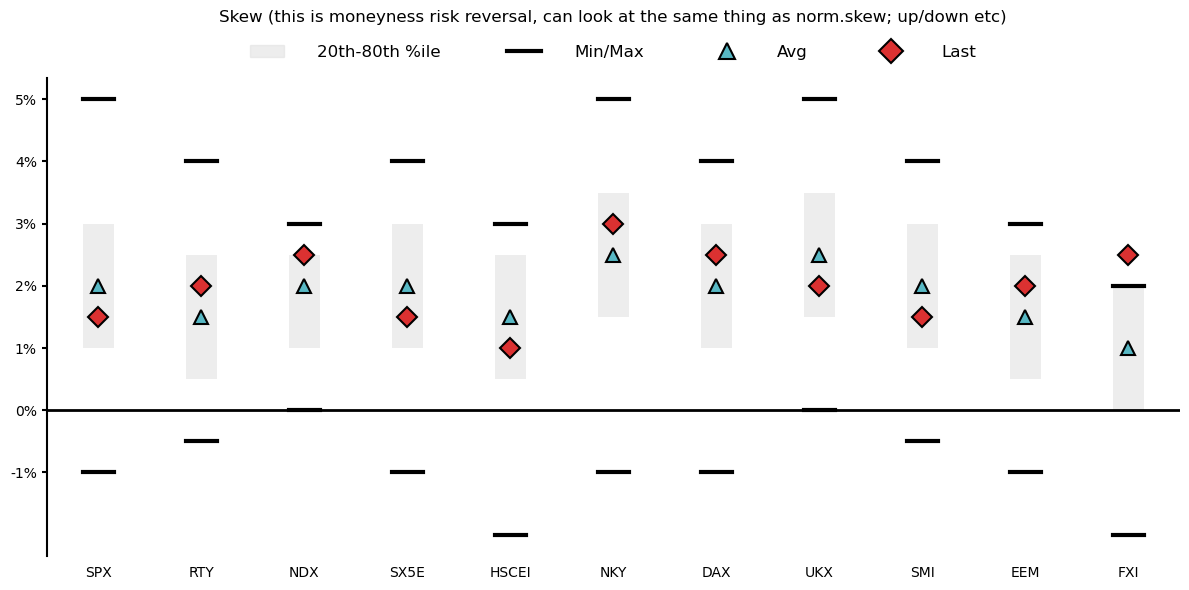

In [5]:
create_stats_chart(categories, min_values, max_values, avg_values, last_values, percentile_20, percentile_80, title, colors, add_percentage_sign=True)

### Term structure

In [6]:
# Example usage
data = {
    '1M': [10, 20, 15, 14, 21],
    '2M': [10.5, 19.5, 15.5, 14.5, 20],
    '3M': [11, 19, 16, 15, 19],
    '6M': [12, 18, 17, 16, 18],
    '12M': [13, 17, 18, 17, 17],
    '24M': [14, 16, 19, 18, 16],
    '36M': [15, 15, 20, 19, 15]
}
index = ['10th', '90th', 'current', '1w_ago', 'peak_stress']
df = pd.DataFrame(data, index=index)

# Colors dictionary
colors = {
    '10th_90th': colorpalette['grey_light'],
    'current': colorpalette['blue'],
    '1w_ago': colorpalette['orange'],
    'peak_stress': colorpalette['red']
}

Plot saved to term_structure.png


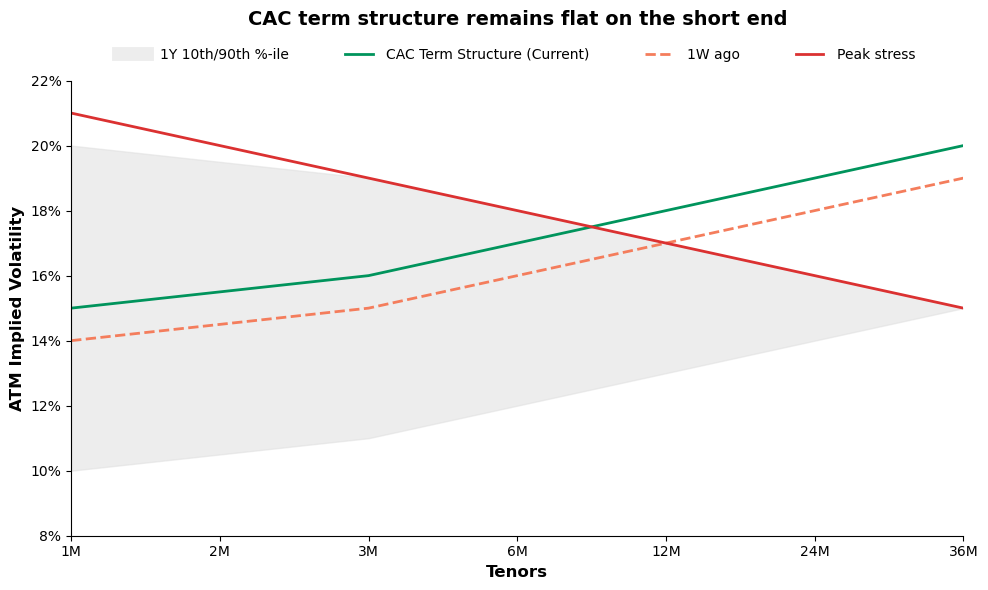

In [7]:
plot_term_structure(df, title='CAC term structure remains flat on the short end', show_grid=False, colors=colors)

### Save

In [8]:
# Load the image and copy it to the clipboard
image = Image.open('plot.png')

# Convert the image to TIFF format in a byte buffer
buffer = BytesIO()
image.save(buffer, format='TIFF')
buffer.seek(0)
data = buffer.read()

# Copy the image to the clipboard
pb = NSPasteboard.generalPasteboard()
pb.clearContents()
pb.setData_forType_(NSData.dataWithBytes_length_(data, len(data)), NSPasteboardTypeTIFF)

print("Plot copied to clipboard!")

Plot copied to clipboard!
